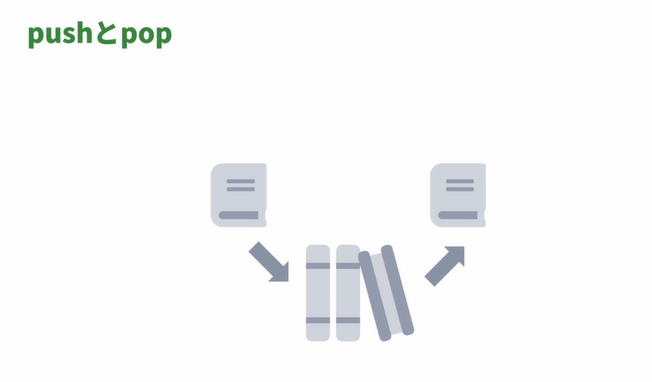

本を積んで一番上から取り出す場合など


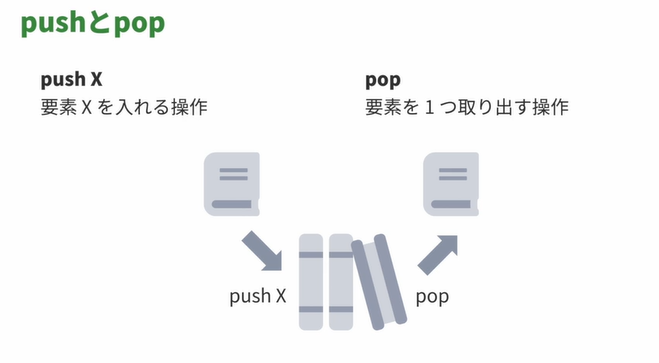

### スタックを用いた代表的な問題

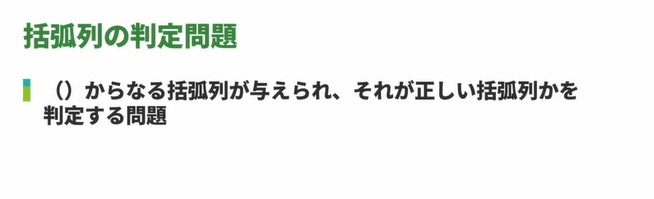

✅ 意味（解説）：

「括弧列」とは、( や ) の並びのことです。
その括弧列が「正しい構造（＝ペアが合っていて、順番も正しい）」になっているかをチェックする問題です。

📌 具体例：  
括弧列	判定	理由  
()	✅ 正しい	開き括弧と閉じ括弧が1セット　　  
(())	✅ 正しい	2段階で正しく閉じられている　　  
(()	❌ 間違い	最後に閉じられていない　　  
())	❌ 間違い	最初に閉じずに閉じ括弧が出てきている　　  
()()	✅ 正しい	両方正しいペア  

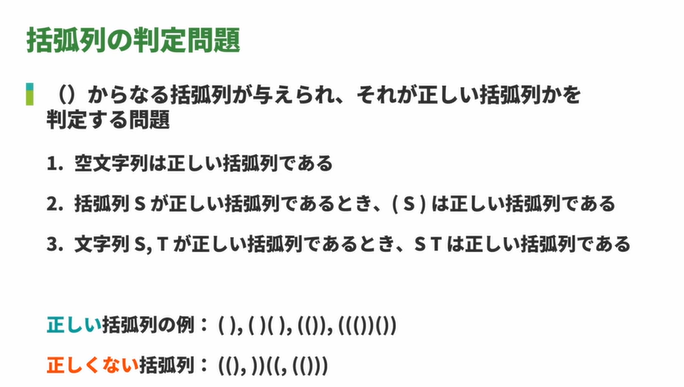

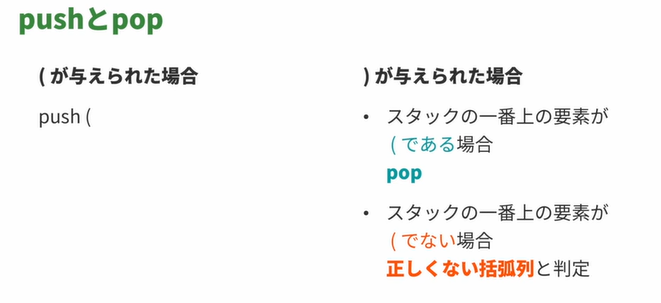

この括弧列の定義を考えると、ある時点までにペアになっていない一番最後の ( が、次に現れる ) に対応していることが、正しい括弧列の条件となります。

ペアになっていない最後の ( と次に現れる ) が対応しない、全体としては正しい括弧列が存在すると仮定してみましょう。
この 2 つの文字の間に文字列 X が存在すると仮定すると、( X ) という構造になります。
括弧列のルールより、X は正しい括弧列である必要があります。
ここからは X が空文字列かで場合分けを行います。

・X が空文字列である場合
( X ) は () となるので、この括弧列は正しいです

・X は空文字列でない場合
X が正しい括弧列である場合 ( と ) がそれぞれ少なくとも 1 つ以上含まれます。
しかし、最後に現れる ( が X の中に含まれるので、( X ) の ( が最後の ( であるという仮定に矛盾します。

よって、X は空文字列である場合にのみ ( X ) は正しい括弧列となるので、
ペアになっていない最後の ( と次に現れる ) は対応する必要があります。

もちろん！
じゃあもっとシンプルに、**図とイメージでわかりやすく**説明しますね。

---

## 🟢 問題のテーマ

> 正しい括弧列って何？どうやって判断するの？

---

## ✅ 正しい括弧列とは？

* `(` と `)` の数が同じ
* 閉じる `)` が、**必ず正しく開いてから閉じられる**

---

## 🔄 正しい括弧列のルール（本質）

**「最後に開いた括弧 `(` に、最初に閉じた `)` を対応させる」**

つまり、「後から開いたものを先に閉じる」＝**スタック構造（後入れ先出し）**

---

## 📦 スタックで考えたら簡単！

```text
入力: (()())
処理:

文字     スタックの中身     メモ
  (         (              ← 開いたのでスタックに入れる
  (         ((             ← 開いたのでまた入れる
  )         (              ← 閉じたので1つ出す（対応完了）
  (         ((             ← また開くから入れる
  )         (              ← 対応するから出す
  )         空っぽ！        ← 最後の対応もOK

スタックが空！ → 正しい括弧列
```

---

## 🔴 間違った場合を見てみる

```text
入力: (())

文字     スタックの中身     メモ
  (         (
  (         ((
  )         (      ← OK
  )         空っぽ ← OK

 ここまではOK

もしここでさらに ) が来たら？

  )         ??? ← 対応する ( がもうない！
→ 間違った括弧列！
```

---

## 🔍 なぜ「最後の `(` と次の `)`」が対応しないとダメなの？

こう考えてみてください：

### ✋ 「最後の (」を無視して他の ( と組ませると…

* その「最後の (」は、ずっと **余ったまま** になります
* → 最後にスタックに残る
* → 括弧列は「正しく閉じていない」ことになる

だから：

> **最後に開いた `(` は、必ず最初に閉じる `)` とペアにしなきゃダメ！**

---

## ✅ 結論（シンプルに）

* 括弧は「後から開いたものを先に閉じる」必要がある
* このルールを守らないと「対応してない `(` または `)` が出てくる」
* → それは **正しくない括弧列**

---

## 💬 イメージで覚えよう！

* 括弧のペアは「段ボールを積んで、順にフタを閉じる」ようなもの
* 最後に積んだ箱（`(`）から先に閉じないと（`)`）、下の箱がフタ閉まらない！

---

どう？これならイメージしやすくなった？
もっと例を見たいとか、図で説明してほしいとかあれば、気軽に言ってね！


In [5]:
# かっこ列を表す文字列をうけとる
n = int(input())
s = input()

# スタックを用意
stack = []

# 先頭から各文字の文字列を見ていく
for i in range(n):
    # i文字目が(か）かを場合分け
    # (の場合はstackにpush
    if s[i] == "(":
        stack.append(s[i])
        print(stack)
    # stackの最後の文字が(の場合popする。
    elif len(stack) > 0 and stack[-1] == "(":
        print(stack)
        stack.pop()
        print(stack)
        

 3
 (((


['(']
['(', '(']
['(', '(', '(']


In [14]:
# かっこ列を表す文字列をうけとる
n = int(input())
s = input()

# スタックを用意
stack = []

# 先頭から各文字の文字列を見ていく
for i in range(n):
    # i文字目が(か）かを場合分け
    # (の場合はstackにpush
    if s[i] == "(":
        stack.append(s[i])
    elif s[i] == ")":
        # stackの最後の文字が(の場合popする。
        if len(stack) > 0 and stack[-1] == "(":
            stack.pop()
        else:
            stack.append(s[i])
        
# 入力された値が正しいかっこ列かどうかを判別
if len(stack) > 0:
    print("No")
else:
    print("Yes")

 4
 (())


Yes
